In [0]:
#cifar 10 data set
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten,BatchNormalization,GaussianNoise

from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers

import keras.backend as K
from keras.optimizers import rmsprop

from keras.utils import np_utils
from keras.datasets import cifar10
import numpy as np

import matplotlib.pyplot as plt

from keras import backend as K
K.set_image_dim_ordering('tf')





In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')

In [38]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
std

64.150024

In [0]:
nClasses = 10
y_train = np_utils.to_categorical(y_train,nClasses)
y_test = np_utils.to_categorical(y_test,nClasses)

In [40]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [0]:
input_shape = (32,32,3)
weight_decay=5e-4

In [0]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay),activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3),kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(GaussianNoise(0.3))    
 
    model.add(Conv2D(64, (3, 3),padding='same',kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(128, (3, 3),padding='same',kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(GaussianNoise(0.2))        
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(x_train)
batchsize = 200
dgen=datagen.flow(x_train, y_train, batch_size=batchsize)


In [0]:
K.clear_session()
model = createModel()

In [0]:
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)

model.compile(opt_rms, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [46]:
epoch = 25
model.fit_generator(dgen,steps_per_epoch=400,epochs=3*epoch,
                    verbose=0,validation_data=(x_test,y_test))

opt_rms = keras.optimizers.rmsprop(lr=0.0015,decay=1e-5)
model.compile(opt_rms, loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit_generator(dgen,steps_per_epoch=501,epochs=epoch,
                    verbose=0,validation_data=(x_test,y_test))

opt_rms = keras.optimizers.rmsprop(lr=0.00035,decay=1e-5)
model.compile(opt_rms, loss='categorical_crossentropy', 
              metrics=['accuracy'])

history=model.fit_generator(dgen,steps_per_epoch=400,epochs=100,
                    verbose=1,validation_data=(x_test,y_test))






Epoch 1/100
400/400 [==============================] - 59s 148ms/step - loss: 0.5716 - acc: 0.8785 - val_loss: 0.5371 - val_acc: 0.8921
Epoch 2/100
400/400 [==============================] - 57s 141ms/step - loss: 0.5264 - acc: 0.8881 - val_loss: 0.5517 - val_acc: 0.8827
Epoch 3/100
400/400 [==============================] - 57s 142ms/step - loss: 0.5035 - acc: 0.8924 - val_loss: 0.5232 - val_acc: 0.8906
Epoch 4/100
400/400 [==============================] - 57s 142ms/step - loss: 0.4874 - acc: 0.8947 - val_loss: 0.5219 - val_acc: 0.8862
Epoch 5/100
400/400 [==============================] - 57s 143ms/step - loss: 0.4711 - acc: 0.8975 - val_loss: 0.5386 - val_acc: 0.8851
Epoch 6/100
400/400 [==============================] - 57s 143ms/step - loss: 0.4616 - acc: 0.8992 - val_loss: 0.5012 - val_acc: 0.8896
Epoch 7/100
400/400 [==============================] - 57s 143ms/step - loss: 0.4507 - acc: 0.9001 - val_loss: 0.4859 - val_acc: 0.8933
Epoch 8/100
400/400 [===========================

Text(0, 0.5, 'Loss')

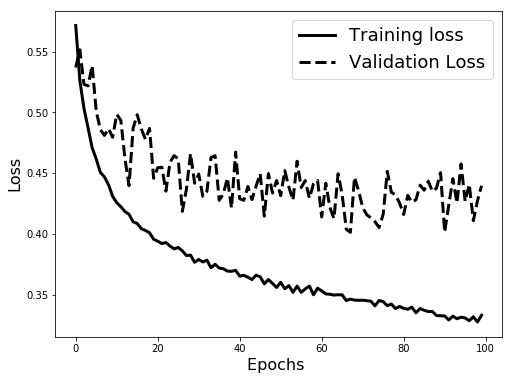

In [47]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)

(0.7, 1)

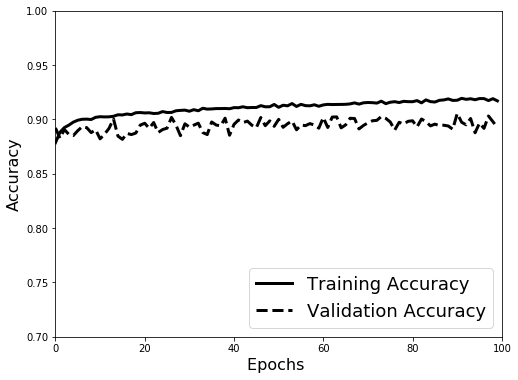

In [54]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'black',linewidth=3.0)
plt.plot(history.history['val_acc'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)
plt.xlim(0,100)
plt.ylim(0.7,1)